# DATA SCIENCE PROJECT
## Data Analysis

In this part, we will analyze the data we have collected. We will try to find some patterns and correlations between the data. Part of the data analysis is in the **dataPreperation** file. Indeed data preperation goes pair with data analysis.

Let's start by importing the libraries we will need, and the clean data we have saved in the previous part.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
x = pd.read_csv('data/valeursfoncieres-2022.csv')
y = pd.read_csv('data/valeursfoncieres-2022-target.csv')

## Means and Deviation

Let's start by looking at the distribution of the data. We will plot the distribution of the data for each feature.

Text(0.5, 1.0, 'Target Standard Deviation')

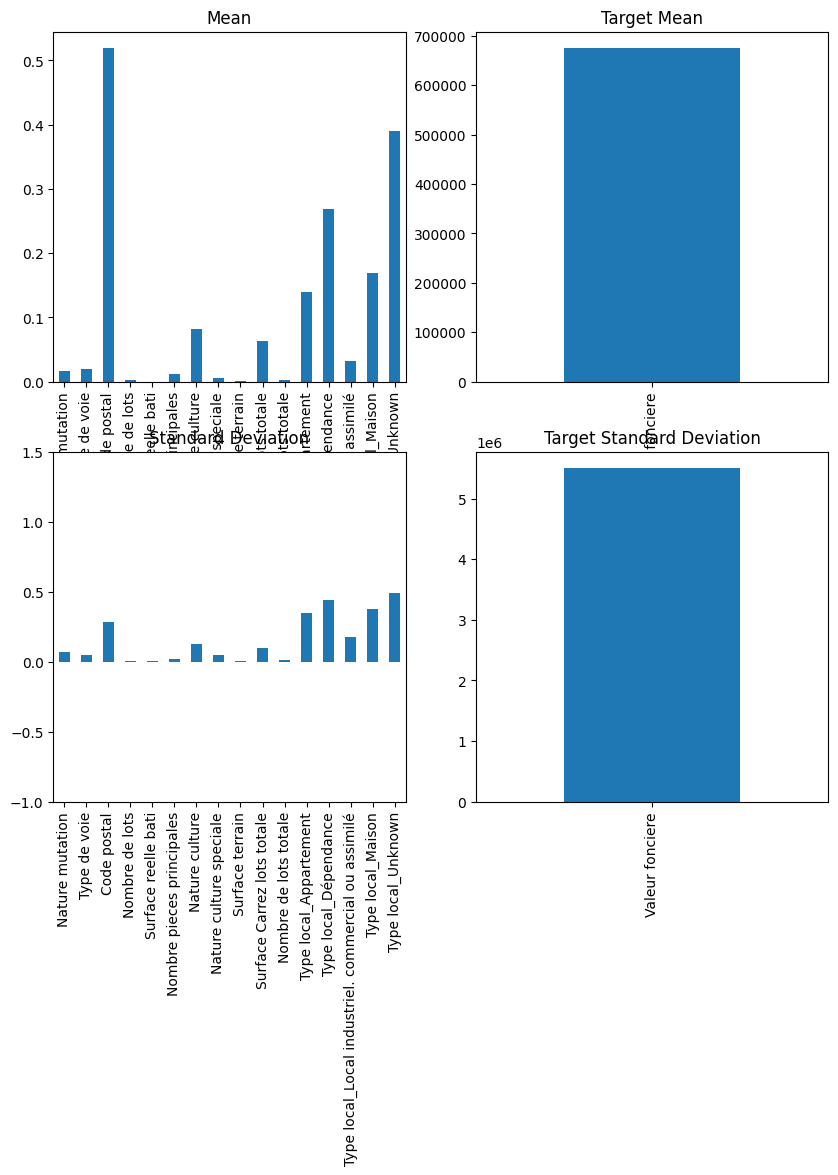

In [5]:

# create sumbplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plot the means
x.mean().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Mean')

y.mean().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Target Mean')

# plot the standard deviation
x.std().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Standard Deviation')
axes[1, 0].set_ylim([-1, 1.5])


y.std().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Target Standard Deviation')

As we can see, the variables are normalized. The Mean variable is always positive. The mean of the target variable is 674 821.

## Distribution

Now let's observe the distribution of each variable

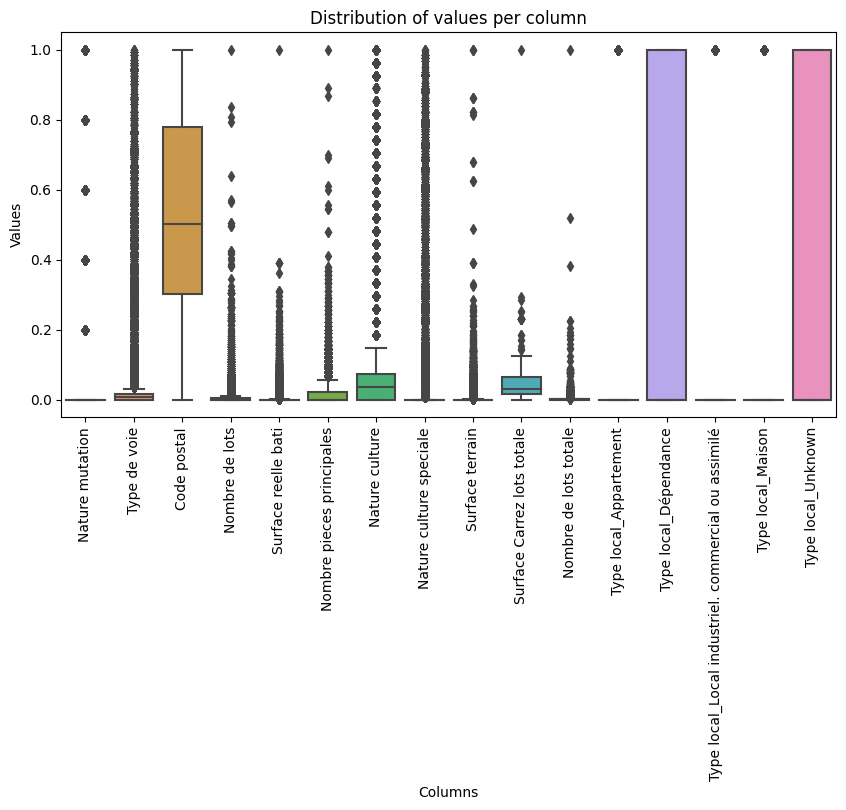

In [3]:
# Plot the distributions
plt.figure(figsize=(10, 5))
sns.boxplot(data=x)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Distribution of values per column')
plt.show()

The distribution of all the categorical columns is not interesting to look at. We will look at the distribution of the numerical columns, that do not represent a category.

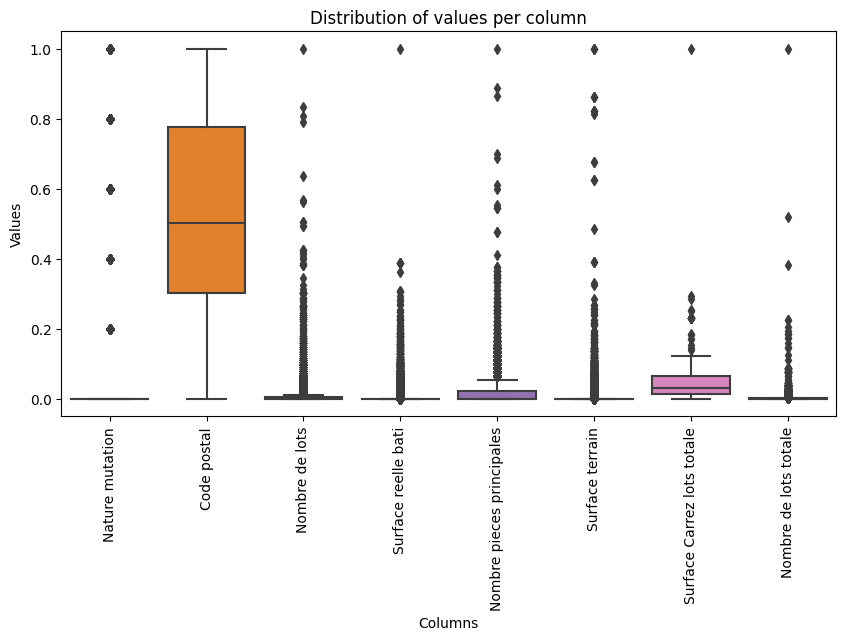

In [7]:

numerical_columns = ['Nature mutation', 'Code postal', 'Nombre de lots',
       'Surface reelle bati', 'Nombre pieces principales',  'Surface terrain',
       'Surface Carrez lots totale', 'Nombre de lots totale',
]

# Plot the distributions
plt.figure(figsize=(10, 5))
sns.boxplot(data=x[numerical_columns])
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Values')

plt.title('Distribution of values per column')
plt.show()



As we can see, most of the variables are distributed close to 0. This is because we chose to represent the NaN values with 0. This is a logical approach, because the NaN values represent the absence of a value, and 0 is the absence of a value for a numerical variable.
However, in future versions of this project, we will try to find a better way to represent the NaN values.

## Variable relationships

Now let's look at the relationship between the variables. We will plot each variable against the target variable.

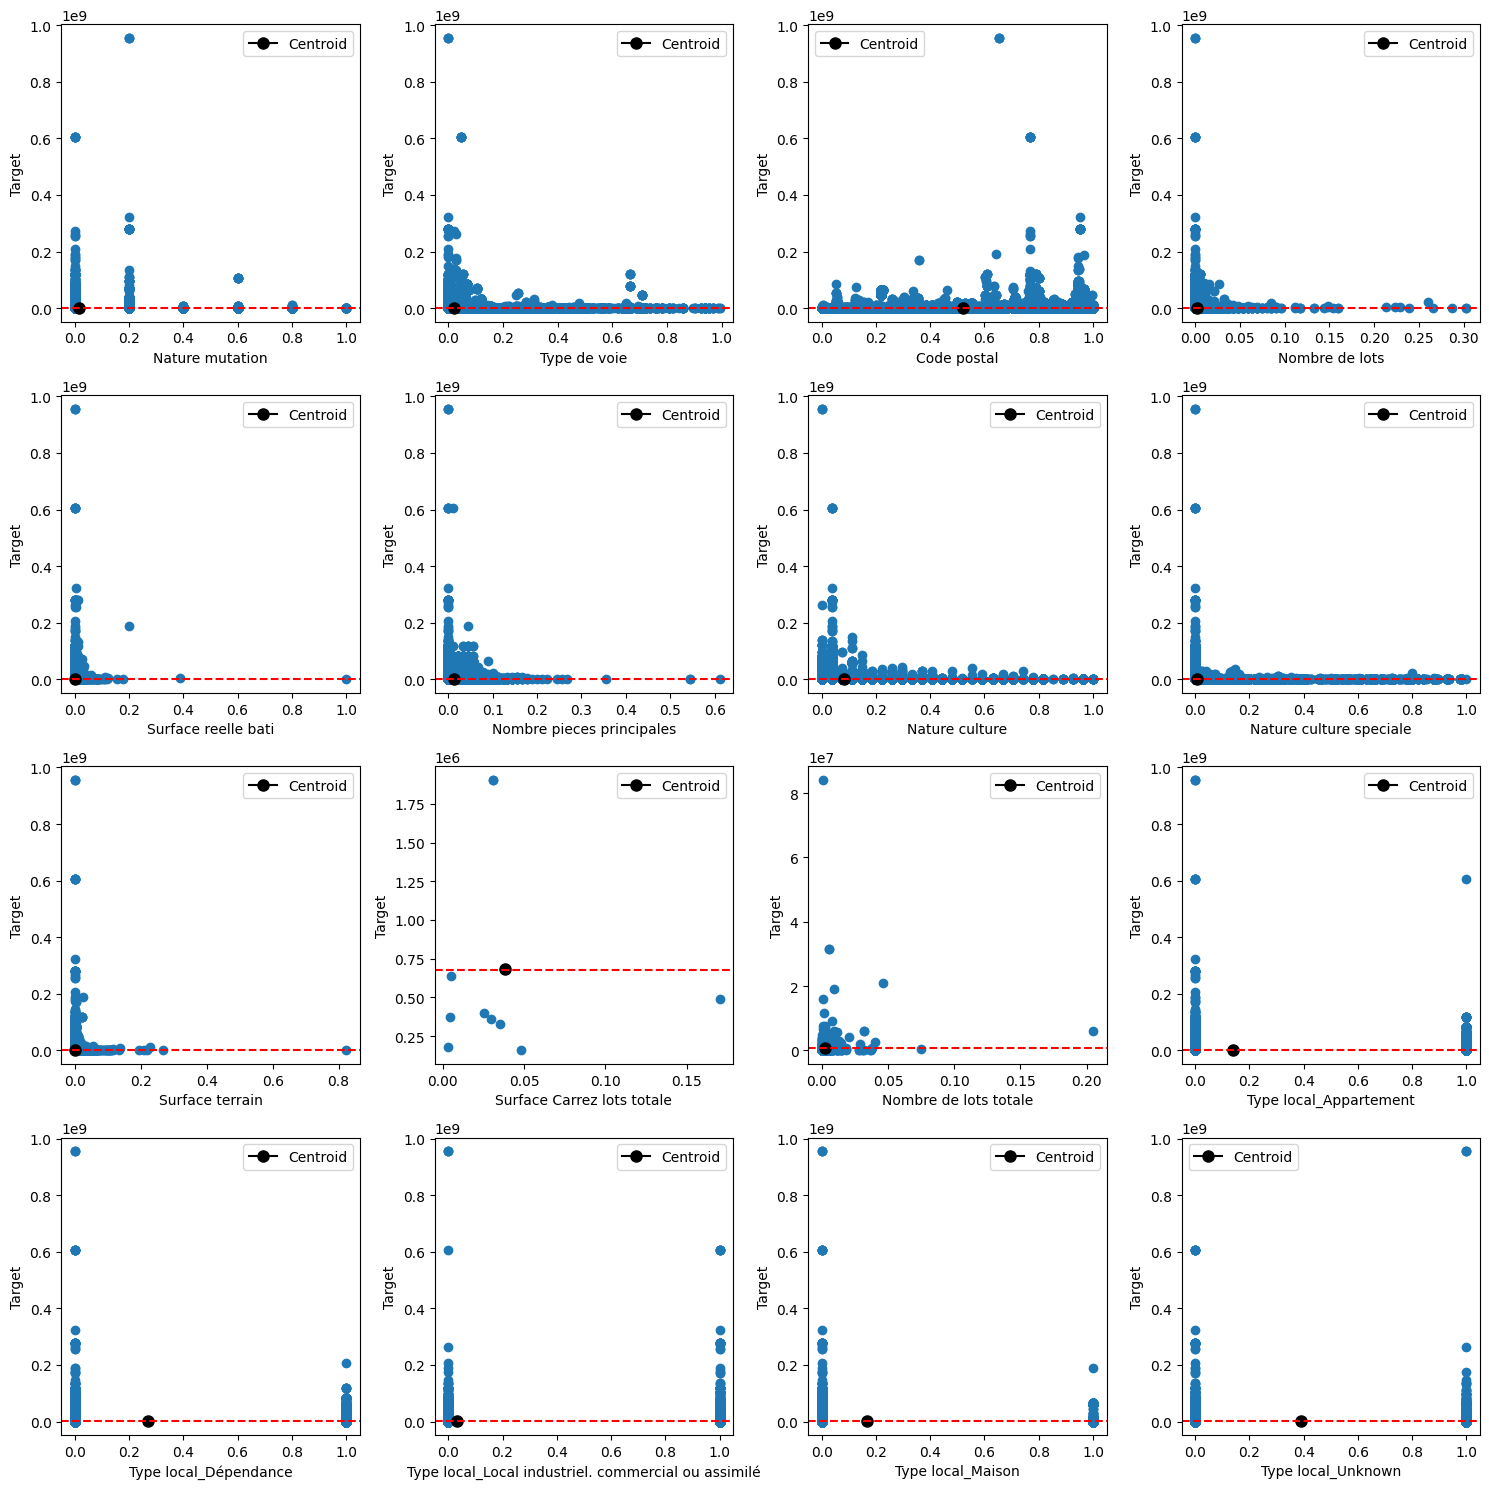

In [22]:
sample = x.sample(frac=0.1, random_state=0)

num_cols = len(sample.columns)
num_rows = (num_cols + 1) // 4  # Calculate the number of rows based on the number of columns

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, 15))

for i, col in enumerate(sample.columns):
    ax = axes[i // 4, i % 4]
    ax.scatter(sample[col], y.loc[sample.index])
    
    # Plot the mean/centroid
    centroid_x = sample[col].mean()
    centroid_y = y.loc[sample.index].mean()
    ax.plot(centroid_x, centroid_y, marker='o', markersize=8, color='black', label='Centroid')
    
    ax.axhline(y.mean().item(), color='red', linestyle='--')  # Add mean line
    ax.set_xlabel(col)
    ax.set_ylabel('Target')
    ax.legend()
    
# Hide empty subplots if the number of columns is odd
if num_cols % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


Now these plots are definitely interesting but it is hard to deduce anything due to how high the outliers in terms of price are. Let's try to remove the outliers and see if we can find any patterns.

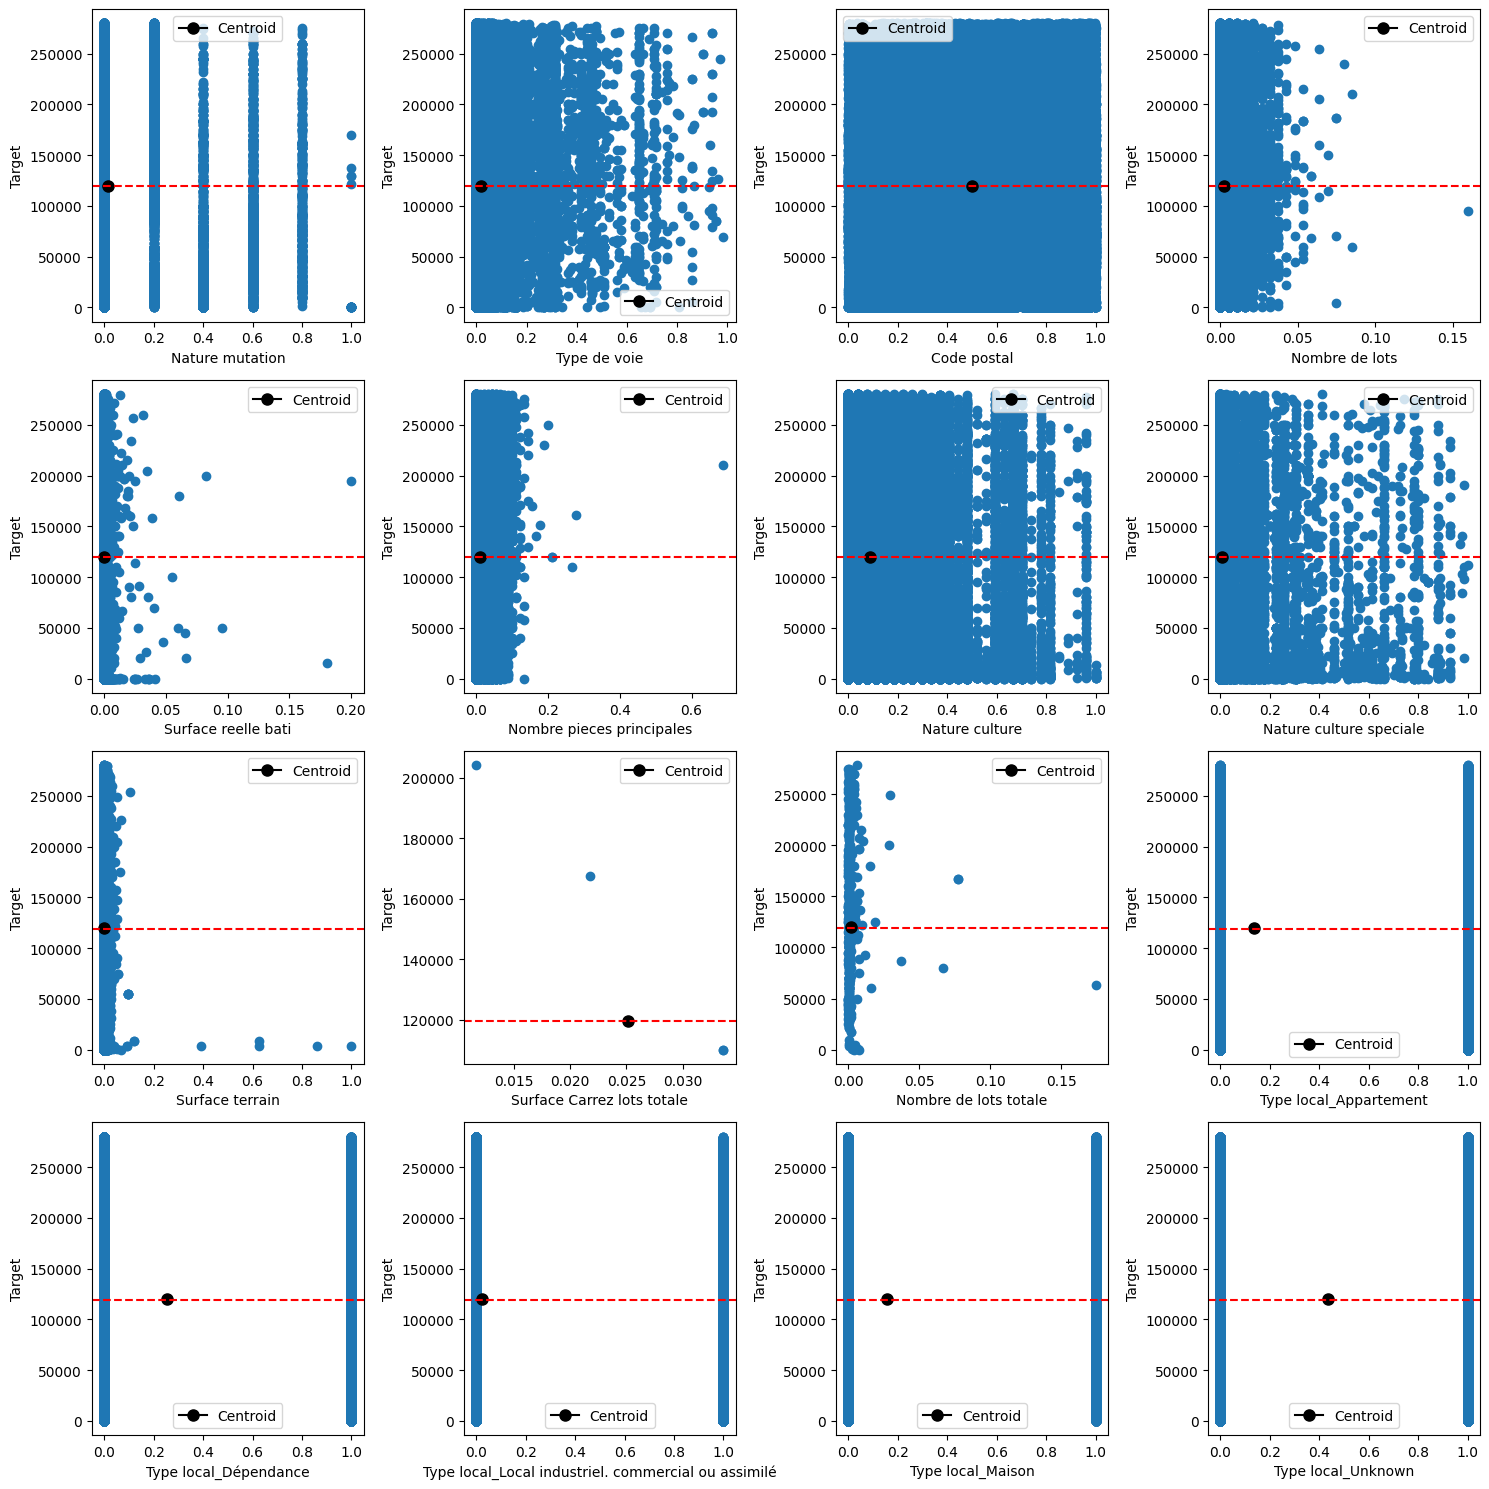

In [23]:
# remove the top 30% of the data
y_new = y[y['Valeur fonciere'] < y['Valeur fonciere'].quantile(0.7)]
x_new = x.loc[y_new.index]

# select sample
sample = x_new.sample(frac=0.1, random_state=0)

num_cols = len(sample.columns)
num_rows = (num_cols + 1) // 4  # Calculate the number of rows based on the number of columns

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, 15))

for i, col in enumerate(sample.columns):
    ax = axes[i // 4, i % 4]
    ax.scatter(sample[col], y_new.loc[sample.index])
    
    # Plot the mean/centroid
    centroid_x = sample[col].mean()
    centroid_y = y_new.loc[sample.index].mean()
    ax.plot(centroid_x, centroid_y, marker='o', markersize=8, color='black', label='Centroid')
    
    ax.axhline(y_new.mean().item(), color='red', linestyle='--')  # Add mean line
    ax.set_xlabel(col)
    ax.set_ylabel('Target')
    ax.legend()
    
# Hide empty subplots if the number of columns is odd
if num_cols % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


These are easier to analyse, but we can see that there is no clear pattern. We will try to find a better way to represent the data.

## Maps


Now let's see what the prices look like on a map.

First we need to un-normalize the "code postal" column of the data.

In [ ]:
cp = x['Code postal']
postal_codes = cp * (max(cp) - min(cp)) + min(cp)

